In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import nn
from torch import optim

import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision

In [2]:
SPECTRUM_IMAGES_CLASSES = './data/music/genres/'

In [3]:
transform = transforms.Compose(
    [transforms.Resize(224),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



full_dataset = torchvision.datasets.ImageFolder(root=SPECTRUM_IMAGES_CLASSES, transform=transform)
full_DataLoader = torch.utils.data.DataLoader(full_dataset, batch_size=4, shuffle=True, num_workers=2)
train_size = int(0.8 * len(full_dataset))

test_size = len(full_dataset) - train_size

trainset, testset = torch.utils.data.random_split(full_dataset, [train_size, test_size])


#trainset = torchvision.datasets.ImageFolder(root=SPECTRUM_IMAGES_CLASSES, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = full_DataLoader.dataset.classes

print(classes)


['HardRock', 'Indie', 'Metal', 'Pop', 'Punk']


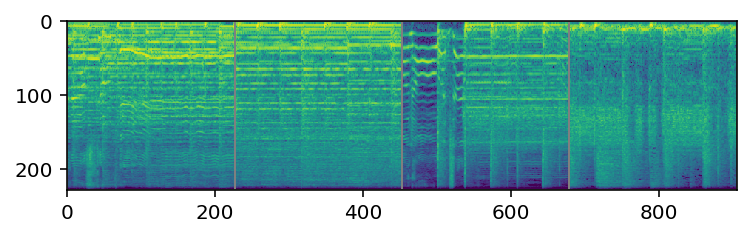

  Pop   Pop  Punk Metal


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
#for i, data in enumerate(trainloader, 0):
    # print the shapes
    #print(np.shape(data[0]))
    #print(i)


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
model.load_state_dict(torch.load("./models/genresv1"));


In [ ]:
#model = torch.load("./models/genresv1")

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net.train()
train_losses=[]
test_losses=[]
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        train_losses.append(loss.item())
        #print(i)
        if i % 100 == 0:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
torch.save(model.state_dict(), "./models/genresV1")

torch.Size([3, 224, 224])
torch.float32


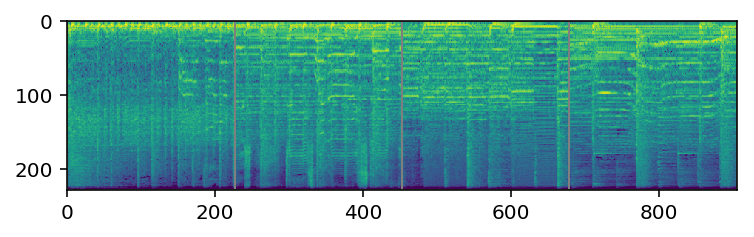

GroundTruth:  Metal  Punk Indie  Punk
Predicted:  Metal  Punk Indie  Punk


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
print(images[0].shape)
print(images[0].dtype)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [12]:

class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        print(images[0].shape)
        print(images[0].dtype)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if(len(labels)<4):
            print(c)
            continue
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32


torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32


torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
torch.Size([3, 224, 224])
torch.float32
tensor([1, 1, 1], dtype=torch.uint8)
Acc

In [ ]:
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()